In [360]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#%pylab inline
import tensorflow as tf
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
np.set_printoptions(precision=2)
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

# Leitura e Tratamento dos Dados

In [399]:
train = pd.read_csv('./dataset/train.csv')
test = pd.read_csv('./dataset/test.csv')
print(f'Train set shape: {train.shape}\nTest set shape: {test.shape}')

Train set shape: (891, 12)
Test set shape: (418, 11)


In [400]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [401]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [402]:
train['Sex_b'] = train['Sex'].map(lambda x: 1 if x == 'female' else 0)
test['Sex_b'] = test['Sex'].map(lambda x: 1 if x == 'female' else 0)

In [403]:
train['Sex_b'].value_counts()

Sex_b
0    577
1    314
Name: count, dtype: int64

In [404]:
train['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [405]:
train['Name'].value_counts()

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64

In [406]:
train['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)

train['Cabin_null'] = train['Cabin'].isnull().astype(int)
train['Cabin_C'] = train['Cabin'].fillna('').str.count('C').astype(int)
train['Cabin_E'] = train['Cabin'].fillna('').str.count('E').astype(int)
train['Cabin_G'] = train['Cabin'].fillna('').str.count('G').astype(int)
train['Cabin_D'] = train['Cabin'].fillna('').str.count('D').astype(int)
train['Cabin_A'] = train['Cabin'].fillna('').str.count('A').astype(int)
train['Cabin_B'] = train['Cabin'].fillna('').str.count('B').astype(int)
train['Cabin_F'] = train['Cabin'].fillna('').str.count('F').astype(int)
train['Cabin_T'] = train['Cabin'].fillna('').str.count('T').astype(int)

train['Name_Miss'] = train['Name'].str.contains('Miss.').astype(int)
train['Name_Mrs'] = train['Name'].str.contains('Mrs.').astype(int)
train['Name_Master'] = train['Name'].str.contains('Master.').astype(int)
train['Name_Col'] = train['Name'].str.contains('Col.').astype(int)
train['Name_Major'] = train['Name'].str.contains('Major.').astype(int)
train['Name_Mr'] = train['Name'].str.contains('Mr.').astype(int)
train['Name_Dr'] = train['Name'].str.contains('Dr.').astype(int)
train['Name_Don'] = train['Name'].str.contains('Don.').astype(int)
train['Name_Sir'] = train['Name'].str.contains('Sir.').astype(int)

train['Ticket_cat'] = train['Ticket'].map(lambda x: list(train['Ticket'].unique()).index(x) if x in list(train['Ticket'].unique()) else 0)
train['Ticket_num'] = train['Ticket'].str.split().map(lambda x: x[1] if len(x) > 1 and x[1].isnumeric() else x[0] if x[0].isnumeric() else 0)

In [407]:
test['Embarked_S'] = (test['Embarked'] == 'S').astype(int)
test['Embarked_C'] = (test['Embarked'] == 'C').astype(int)

#test['Cabin_null'] = test['Cabin'].map(lambda x: 0 if x is np.nan else len(str(x)))
test['Cabin_null'] = test['Cabin'].isnull().astype(int)
test['Cabin_C'] = test['Cabin'].fillna('').str.count('C').astype(int)
test['Cabin_E'] = test['Cabin'].fillna('').str.count('E').astype(int)
test['Cabin_G'] = test['Cabin'].fillna('').str.count('G').astype(int)
test['Cabin_D'] = test['Cabin'].fillna('').str.count('D').astype(int)
test['Cabin_A'] = test['Cabin'].fillna('').str.count('A').astype(int)
test['Cabin_B'] = test['Cabin'].fillna('').str.count('B').astype(int)
test['Cabin_F'] = test['Cabin'].fillna('').str.count('F').astype(int)
test['Cabin_T'] = test['Cabin'].fillna('').str.count('T').astype(int)

test['Name_Miss'] = test['Name'].str.contains('Miss.').astype(int)
test['Name_Mrs'] = test['Name'].str.contains('Mrs.').astype(int)
test['Name_Master'] = test['Name'].str.contains('Master.').astype(int)
test['Name_Col'] = test['Name'].str.contains('Col.').astype(int)
test['Name_Major'] = test['Name'].str.contains('Major.').astype(int)
test['Name_Mr'] = test['Name'].str.contains('Mr.').astype(int)
test['Name_Dr'] = test['Name'].str.contains('Dr.').astype(int)
test['Name_Don'] = test['Name'].str.contains('Don.').astype(int)
test['Name_Sir'] = test['Name'].str.contains('Sir.').astype(int)

test['Ticket_cat'] = test['Ticket'].map(lambda x: list(test['Ticket'].unique()).index(x) if x in list(test['Ticket'].unique()) else 0)
test['Ticket_num'] = test['Ticket'].str.split().map(lambda x: x[1] if len(x) > 1 and x[1].isnumeric() else x[0] if x[0].isnumeric() else 0)

In [408]:
variaveis = ['Sex_b', 'Age', 'Pclass', 'Embarked_S', 'Embarked_C', 'SibSp', 'Parch', 'Fare', 'Cabin_null',
             'Cabin_C', 'Cabin_E', 'Cabin_G', 'Cabin_D', 'Cabin_A', 'Cabin_B', 'Cabin_F', 'Cabin_T',
             'Name_Miss', 'Name_Mrs', 'Name_Master', 'Name_Col', 'Name_Major', 'Name_Mr', 'Name_Dr', 'Name_Don',
             'Name_Sir', 'Ticket_num', 'Ticket_cat']

In [409]:
X = train[variaveis].fillna(-1)
X_test = test[variaveis].fillna(-1)
y = train['Survived']

In [410]:
#X = pd.get_dummies(data=X, prefix=['Ticket_cat'], columns=['Ticket_cat'], dtype=int).drop(columns=['Ticket_cat_0'], axis=0)
X

,Sex_b,Age,Pclass,Embarked_S,Embarked_C,SibSp,Parch,Fare,Cabin_null,Cabin_C,...,Name_Mrs,Name_Master,Name_Col,Name_Major,Name_Mr,Name_Dr,Name_Don,Name_Sir,Ticket_num,Ticket_cat
0,0,22.0,3,1,0,1,0,7.2500,1,0,...,0,0,0,0,1,0,0,0,21171,0
1,1,38.0,1,0,1,1,0,71.2833,0,1,...,1,0,0,0,1,0,0,0,17599,1
2,1,26.0,3,1,0,0,0,7.9250,1,0,...,0,0,0,0,0,0,0,0,3101282,2
3,1,35.0,1,1,0,1,0,53.1000,0,1,...,1,0,0,0,1,0,0,0,113803,3
4,0,35.0,3,1,0,0,0,8.0500,1,0,...,0,0,0,0,1,0,0,0,373450,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,2,1,0,0,0,13.0000,1,0,...,0,0,0,0,0,0,0,0,211536,677
887,1,19.0,1,1,0,0,0,30.0000,0,0,...,0,0,0,0,0,0,0,0,112053,678
888,1,-1.0,3,1,0,1,2,23.4500,1,0,...,0,0,0,0,0,0,0,0,6607,614
889,0,26.0,1,0,1,0,0,30.0000,0,1,...,0,0,0,0,1,0,0,0,111369,679


In [411]:
#X_test = pd.get_dummies(data=X_test, prefix=['Ticket_cat'], columns=['Ticket_cat'], dtype=int).drop(columns=['Ticket_cat_0'], axis=0)
X_test

,Sex_b,Age,Pclass,Embarked_S,Embarked_C,SibSp,Parch,Fare,Cabin_null,Cabin_C,...,Name_Mrs,Name_Master,Name_Col,Name_Major,Name_Mr,Name_Dr,Name_Don,Name_Sir,Ticket_num,Ticket_cat
0,0,34.5,3,0,0,0,0,7.8292,1,0,...,0,0,0,0,1,0,0,0,330911,0
1,1,47.0,3,1,0,1,0,7.0000,1,0,...,1,0,0,0,1,0,0,0,363272,1
2,0,62.0,2,0,0,0,0,9.6875,1,0,...,0,0,0,0,1,0,0,0,240276,2
3,0,27.0,3,1,0,0,0,8.6625,1,0,...,0,0,0,0,1,0,0,0,315154,3
4,1,22.0,3,1,0,1,1,12.2875,1,0,...,1,0,0,0,1,0,0,0,3101298,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,-1.0,3,1,0,0,0,8.0500,1,0,...,0,0,0,0,1,0,0,0,3236,358
414,1,39.0,1,0,1,0,0,108.9000,0,1,...,0,0,0,0,0,0,1,0,17758,359
415,0,38.5,3,1,0,0,0,7.2500,1,0,...,0,0,0,0,1,0,0,0,3101262,360
416,0,-1.0,3,1,0,0,0,8.0500,1,0,...,0,0,0,0,1,0,0,0,359309,361


# Rede Neural

In [412]:
learning_rate = 1e-4
lambda_r = 1e-2

threshold = 0.5

kf = RepeatedKFold(n_splits=3, n_repeats=1, random_state=42)

scaler = StandardScaler()

step_train = []
step = []

for linhas_train, linhas_cv in kf.split(X):
    X_train, X_cv = X.iloc[linhas_train].copy(), X.iloc[linhas_cv].copy()
    y_train, y_cv = y.iloc[linhas_train].copy(), y.iloc[linhas_cv].copy()

    X_train = scaler.fit_transform(X_train)
    X_cv = scaler.transform(X_cv)

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=250, activation='relu', name='L1', kernel_regularizer=tf.keras.regularizers.l2(lambda_r)),
        tf.keras.layers.Dense(units=150, activation='relu', name='L2', kernel_regularizer=tf.keras.regularizers.l2(lambda_r)),
        tf.keras.layers.Dense(units=75, activation='relu', name='L3', kernel_regularizer=tf.keras.regularizers.l2(lambda_r)),
        tf.keras.layers.Dense(units=25, activation='relu', name='L4', kernel_regularizer=tf.keras.regularizers.l2(lambda_r)),
        tf.keras.layers.Dense(units=1, activation='linear', name='L5')
    ], name='model')
    
    model.compile(loss=BinaryCrossentropy(from_logits=True),
                  optimizer=Adam(learning_rate=learning_rate))
    
    model.fit(X_train, y_train, epochs=200)

    yhat_train = model.predict(X_train)
    yhat = model.predict(X_cv)

    yhat_train = tf.math.sigmoid(yhat_train)
    yhat_train = np.where(yhat_train >= threshold, 1, 0)
    acc_train = np.sum(yhat_train) / np.sum(y_train)

    yhat = tf.math.sigmoid(yhat)
    yhat = np.where(yhat >= threshold, 1, 0)
    acc = np.sum(yhat) / np.sum(y_cv)

    print(f'\nacc_train: {acc_train}, acc_cv: {acc}\n')

    step_train.append(acc_train)
    step.append(acc)

Epoch 1/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 4.4051 
Epoch 2/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.2705 
Epoch 3/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.1325 
Epoch 4/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.0079
Epoch 5/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.8754
Epoch 6/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.7511 
Epoch 7/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6654 
Epoch 8/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5483 
Epoch 9/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4544 
Epoch 10/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3421 
Epoch 11/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2642 
Epoch 12/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1672
Epoch 13/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0802
Epoch 14/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9872 
Epoch 15/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2

In [413]:
print(f'Train mean: {np.mean(step_train)}, CV mean: {np.mean(step)}')

Train mean: 0.8810284047165607, CV mean: 0.8806637806637806


((array([1., 1., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0.86, 0.86, 0.87, 0.88, 0.88, 0.89, 0.89, 0.9 , 0.91, 0.91, 0.92]),
  <BarContainer object of 10 artists>),
 (array([1., 0., 0., 0., 0., 0., 0., 0., 1., 1.]),
  array([0.84, 0.84, 0.85, 0.86, 0.87, 0.87, 0.88, 0.89, 0.89, 0.9 , 0.91]),
  <BarContainer object of 10 artists>))

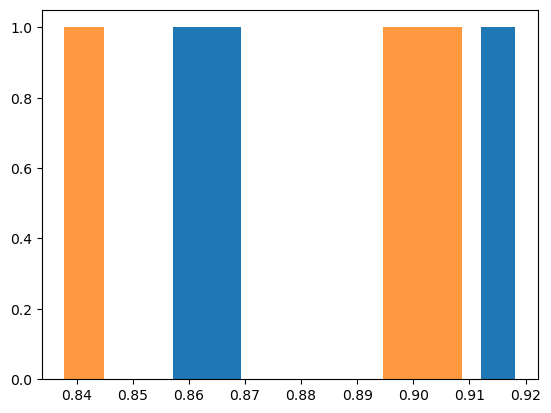

In [416]:
pylab.hist(step), pylab.hist(step_train, alpha=.8)

In [417]:
model.summary()

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 250)            │         7,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 150)            │        37,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 75)             │        11,325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L4 (Dense)                      │ (None, 25)             │         1,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L5 (Dense)                      │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 174,455 (681.47 KB)

 Trainable params: 58,151 (227.15 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 116,304 (454.32 KB)

## Análise de Erro

In [418]:
X_cv_erro = train.iloc[linhas_cv].copy()
X_cv_erro['yhat'] = yhat
X_cv_erro.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Name_Master,Name_Col,Name_Major,Name_Mr,Name_Dr,Name_Don,Name_Sir,Ticket_cat,Ticket_num,yhat
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,1,0,0,0,1,17599,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,1,0,0,0,4,373450,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,0,0,0,1,0,0,0,8,347742,0
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,...,0,0,0,1,0,0,0,13,347082,0
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,...,0,0,0,0,0,0,0,14,350406,1


In [419]:
erro = X_cv_erro[X_cv_erro['Survived'] != X_cv_erro['yhat']]
erro = erro[['Survived', 'yhat', 'Name', 'Cabin', 'Embarked', 'Sex', 'Sex_b', 'Age', 'Pclass', 'Embarked_S',
             'Embarked_C', 'SibSp', 'Parch', 'Fare', 'Cabin_null',
             'Cabin_C', 'Cabin_E', 'Cabin_G', 'Cabin_D', 'Cabin_A', 'Cabin_B', 'Cabin_F', 'Cabin_T',
             'Name_Miss', 'Name_Mrs', 'Name_Master', 'Name_Col', 'Name_Major', 'Name_Mr', 'Name_Dr', 'Name_Don', 'Name_Sir']]
erro.head()

,Survived,yhat,Name,Cabin,Embarked,Sex,Sex_b,Age,Pclass,Embarked_S,...,Cabin_T,Name_Miss,Name_Mrs,Name_Master,Name_Col,Name_Major,Name_Mr,Name_Dr,Name_Don,Name_Sir
8,1,0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",NaN,S,female,1,27.0,3,1,...,0,0,1,0,0,0,1,0,0,0
14,0,1,"Vestrom, Miss. Hulda Amanda Adolfina",NaN,S,female,1,14.0,3,1,...,0,1,0,0,0,0,0,0,0,0
21,1,0,"Beesley, Mr. Lawrence",D56,S,male,0,34.0,2,1,...,0,0,0,0,0,0,1,0,0,0
36,1,0,"Mamee, Mr. Hanna",NaN,C,male,0,NaN,3,0,...,0,0,0,0,0,0,1,0,0,0
47,1,0,"O'Driscoll, Miss. Bridget",NaN,Q,female,1,NaN,3,0,...,0,1,0,0,0,0,0,1,0,0


In [420]:
female = erro[erro['Sex_b'] == 1]
male = erro[erro['Sex_b'] == 0]

In [421]:
female.sort_values('Survived')

,Survived,yhat,Name,Cabin,Embarked,Sex,Sex_b,Age,Pclass,Embarked_S,...,Cabin_T,Name_Miss,Name_Mrs,Name_Master,Name_Col,Name_Major,Name_Mr,Name_Dr,Name_Don,Name_Sir
246,0,1,"Lindahl, Miss. Agda Thorilda Viktoria",NaN,S,female,1,25.0,3,1,...,0,1,0,0,0,0,0,0,0,0
419,0,1,"Van Impe, Miss. Catharina",NaN,S,female,1,10.0,3,1,...,0,1,0,0,0,0,0,0,0,0
415,0,1,"Meek, Mrs. Thomas (Annie Louise Rowley)",NaN,S,female,1,NaN,3,1,...,0,0,1,0,0,0,1,0,0,0
297,0,1,"Allison, Miss. Helen Loraine",C22 C26,S,female,1,2.0,1,1,...,0,1,0,0,0,0,0,0,0,0
293,0,1,"Haas, Miss. Aloisia",NaN,S,female,1,24.0,3,1,...,0,1,0,0,0,0,0,0,0,0
702,0,1,"Barbara, Miss. Saiide",NaN,C,female,1,18.0,3,0,...,0,1,0,0,0,0,0,0,0,0
251,0,1,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",G6,S,female,1,29.0,3,1,...,0,0,1,0,0,0,1,0,0,0
474,0,1,"Strandberg, Miss. Ida Sofia",NaN,S,female,1,22.0,3,1,...,0,1,0,0,0,0,0,0,0,0
498,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",C22 C26,S,female,1,25.0,1,1,...,0,0,1,0,0,0,1,0,0,0
502,0,1,"O'Sullivan, Miss. Bridget Mary",NaN,Q,female,1,NaN,3,0,...,0,1,0,0,0,0,0,0,0,0


In [422]:
male.sort_values('Survived')

,Survived,yhat,Name,Cabin,Embarked,Sex,Sex_b,Age,Pclass,Embarked_S,...,Cabin_T,Name_Miss,Name_Mrs,Name_Master,Name_Col,Name_Major,Name_Mr,Name_Dr,Name_Don,Name_Sir
872,0,1,"Carlsson, Mr. Frans Olof",B51 B53 B55,S,male,0,33.0,1,1,...,0,0,0,0,0,0,1,0,0,0
452,0,1,"Foreman, Mr. Benjamin Laventall",C111,C,male,0,30.0,1,0,...,0,0,0,0,0,0,1,0,0,0
671,0,1,"Davidson, Mr. Thornton",B71,S,male,0,31.0,1,1,...,0,0,0,0,0,0,1,0,0,0
505,0,1,"Penasco y Castellana, Mr. Victor de Satode",C65,C,male,0,18.0,1,0,...,0,0,0,0,0,0,1,0,0,0
102,0,1,"White, Mr. Richard Frasar",D26,S,male,0,21.0,1,1,...,0,0,0,0,0,0,1,0,0,0
782,0,1,"Long, Mr. Milton Clyde",D6,S,male,0,29.0,1,1,...,0,0,0,0,0,0,1,0,0,0
748,0,1,"Marvin, Mr. Daniel Warner",D30,S,male,0,19.0,1,1,...,0,0,0,0,0,0,1,0,0,0
681,1,0,"Hassab, Mr. Hammad",D49,C,male,0,27.0,1,0,...,0,0,0,0,0,0,1,0,0,0
647,1,0,"Simonius-Blumer, Col. Oberst Alfons",A26,C,male,0,56.0,1,0,...,0,0,0,0,1,0,0,0,0,0
645,1,0,"Harper, Mr. Henry Sleeper",D33,C,male,0,48.0,1,0,...,0,0,0,0,0,0,1,0,0,0


# Retreinando o Modelo

In [393]:
scaler = StandardScaler()

X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

In [394]:
lambda_r = 1e-2
learning_rate = 1e-4

threshold = .5

model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=150, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_r)),
        tf.keras.layers.Dense(units=75, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_r)),
        tf.keras.layers.Dense(units=25, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_r)),
        tf.keras.layers.Dense(units=1, activation='linear')
])
    
model.compile(loss=BinaryCrossentropy(from_logits=True),
                  optimizer=Adam(learning_rate=learning_rate))
    
model.fit(X, y, epochs=200)

Epoch 1/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.5174
Epoch 2/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4208
Epoch 3/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3515
Epoch 4/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2763
Epoch 5/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2087
Epoch 6/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1412
Epoch 7/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0876
Epoch 8/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0111
Epoch 9/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9529
Epoch 10/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9053
Epoch 11/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8439
Epoch 12/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7936
Epoch 13/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7546
Epoch 14/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7042
Epoch 15/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6862
Epoc

In [395]:
# computando a previsão de X_test
y_hat = model.predict(X_test)
y_hat = tf.math.sigmoid(y_hat)
y_hat = np.where(y_hat >=threshold, 1, 0)
y_hat

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
    

# Criando o Resultado das Previsões para Importar ao Kaggle

In [396]:
result = pd.Series(y_hat.reshape(-1), index=test['PassengerId'], name='Survived')
result

PassengerId
892     0
893     0
894     0
895     0
896     1
       ..
1305    0
1306    0
1307    0
1308    0
1309    1
Name: Survived, Length: 418, dtype: int32

In [397]:
result.to_csv('./yhat/neural_network_model.csv', header=True)